<a href="https://colab.research.google.com/github/KrituneX/Machine-Learning/blob/main/UTS/Clustering_UTS_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
1. Buat pipeline end-to-end untuk clustering model machine learning:  
a. Pengumpulan & pembersihan data (Pandas)  
b. Feature Selection (Constant-Quasi-Constant-Duplicates, Correlation, Mutual Information, Chi-Square Test, ANOVA/MANOVA, etc)  
c. Feature Engineering (Transformasi Data, Standardisasi, Normalisasi, etc)  
d. Model-model yang akan dijalankan dengan modul scikit-learn meliputi KMeans, AgglomerativeClustering, DBSCAN, GaussianMixture serta SpectralClustering  
2. Gunakan Matriks Evaluasi (Silhouette Score, Davies-Bouldin Index, Calinski-Harabasz Score) serta visualisasikan Silhouette plot, Dendrogram, dan Cluster Scatter Plot! Jelaskan matriks mana terbaik!  
3. Beri penjelasan untuk setiap model yang ada. kerjakan soal analisa, model mana terbaik serta jelaskan mengapa!

Here is all the data you need:
"UTSClustering.csv"

## Data loading

### Subtask:
Load the dataset "UTSClustering.csv" into a pandas DataFrame.


**Reasoning**:
Load the dataset "UTSClustering.csv" into a pandas DataFrame and display its first few rows and shape.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('UTSClustering.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'UTSClustering.csv' not found. Please ensure the file exists in the current directory.")
    df = None

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 79780: invalid start byte

**Reasoning**:
The previous code failed due to a UnicodeDecodeError.  This suggests the file might not be encoded in UTF-8.  I will retry loading the file, specifying different encodings.



In [2]:
import pandas as pd

try:
    df = pd.read_csv('UTSClustering.csv', encoding='latin-1')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'UTSClustering.csv' not found. Please ensure the file exists in the current directory.")
    df = None
except UnicodeDecodeError:
    print("Error: Could not decode file with 'latin-1' encoding. Trying other encodings...")
    try:
      df = pd.read_csv('UTSClustering.csv', encoding='iso-8859-1')
      display(df.head())
      print(df.shape)
    except UnicodeDecodeError:
        print("Error: Could not decode file with common encodings. Please check file encoding manually.")
        df = None

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


(541909, 8)


## Data cleaning

### Subtask:
Clean the dataframe `df` loaded in the previous step.


**Reasoning**:
Inspect the data for missing values, duplicates, and outliers, then clean the data accordingly.



In [3]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values in 'CustomerID' by dropping rows with missing values.
# Justification: 'CustomerID' is important for analysis, and imputation might introduce bias.
# The number of missing values is relatively small compared to the dataset size.
df = df.dropna(subset=['CustomerID'])

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Outlier detection and treatment
numerical_cols = ['Quantity', 'UnitPrice']
for col in numerical_cols:
    # Visualize the distribution using a box plot
    # plt.figure(figsize=(8, 6))
    # df.boxplot(column=col)
    # plt.title(f'Boxplot of {col}')
    # plt.ylabel(col)
    # plt.show()

    # Winsorization for outlier treatment
    # Justification: Winsorization is preferred over removal to retain data points while mitigating outlier effects
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Display the cleaned DataFrame
display(df.head())
print(df.shape)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


(401604, 8)


## Data exploration

### Subtask:
Explore the cleaned dataset to understand its characteristics.


**Reasoning**:
Examine the data types, descriptive statistics, and distributions of features in the DataFrame.  Visualize numerical and categorical features to understand their characteristics and potential relationships.



InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

Descriptive statistics for Quantity:
count    401604.000000
mean          8.114102
std           8.257794
min         -13.000000
25%           2.000000
50%           5.000000
75%          12.000000
max          27.000000
Name: Quantity, dtype: float64


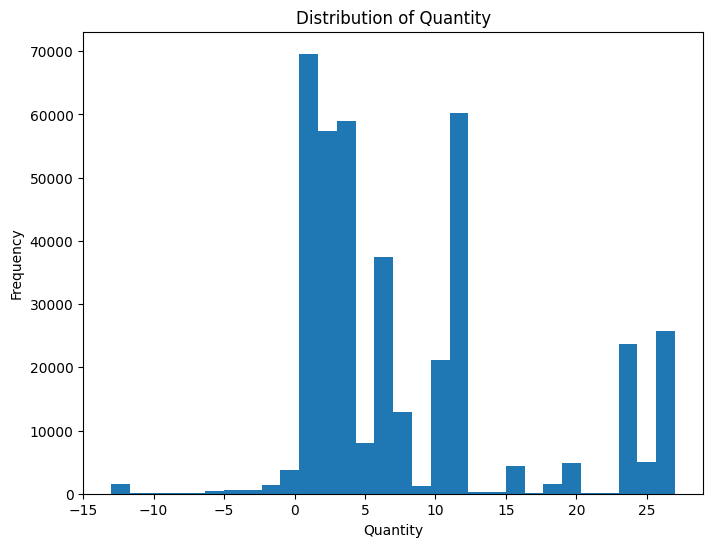

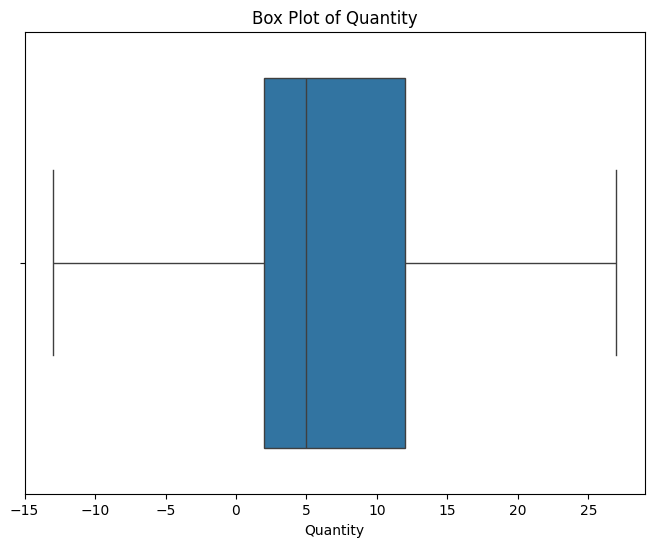


Descriptive statistics for UnitPrice:
count    401604.000000
mean          2.621666
std           2.118421
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max           7.500000
Name: UnitPrice, dtype: float64


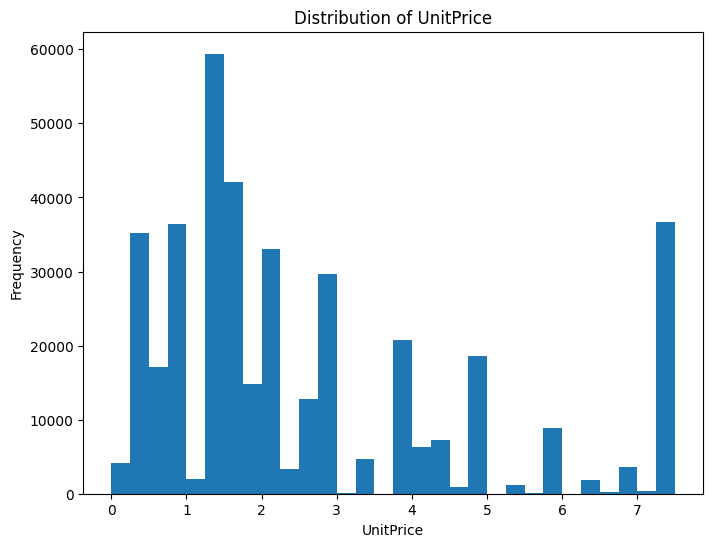

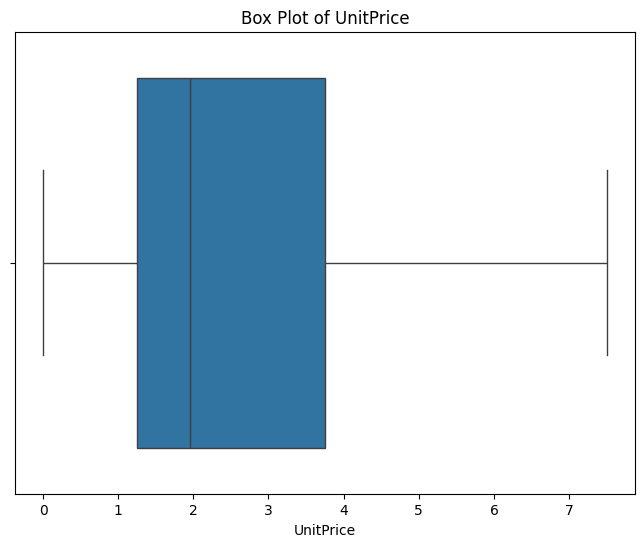


Value counts for InvoiceNo:
InvoiceNo
576339    0.001350
579196    0.001327
580727    0.001317
578270    0.001101
573576    0.001083
567656    0.001048
567183    0.000976
575607    0.000939
571441    0.000906
570488    0.000879
Name: proportion, dtype: float64


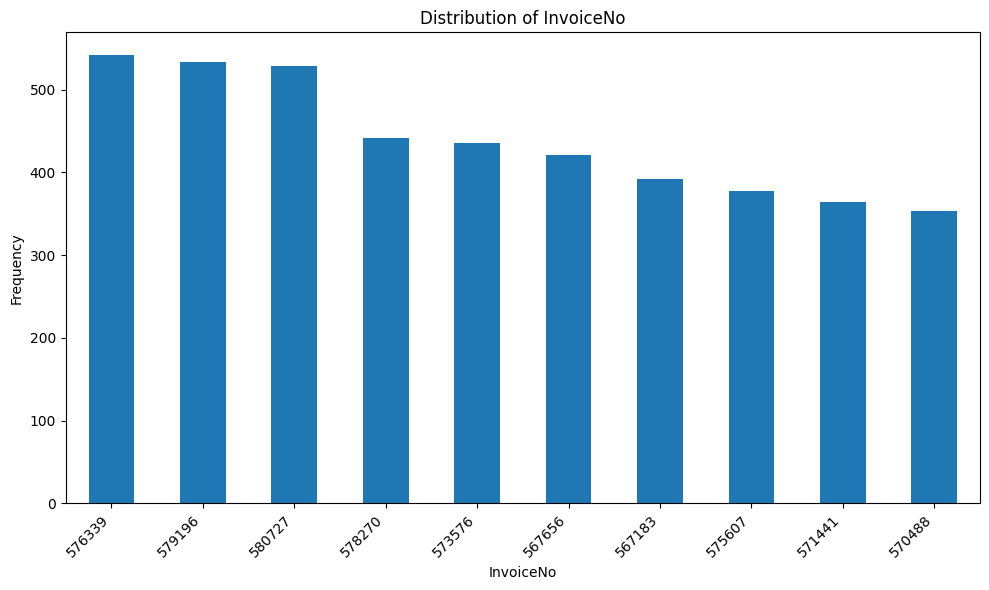


Value counts for StockCode:
StockCode
85123A    0.005142
22423     0.004716
85099B    0.004131
47566     0.003508
84879     0.003498
20725     0.003352
22720     0.003048
POST      0.002978
22197     0.002764
23203     0.002759
Name: proportion, dtype: float64


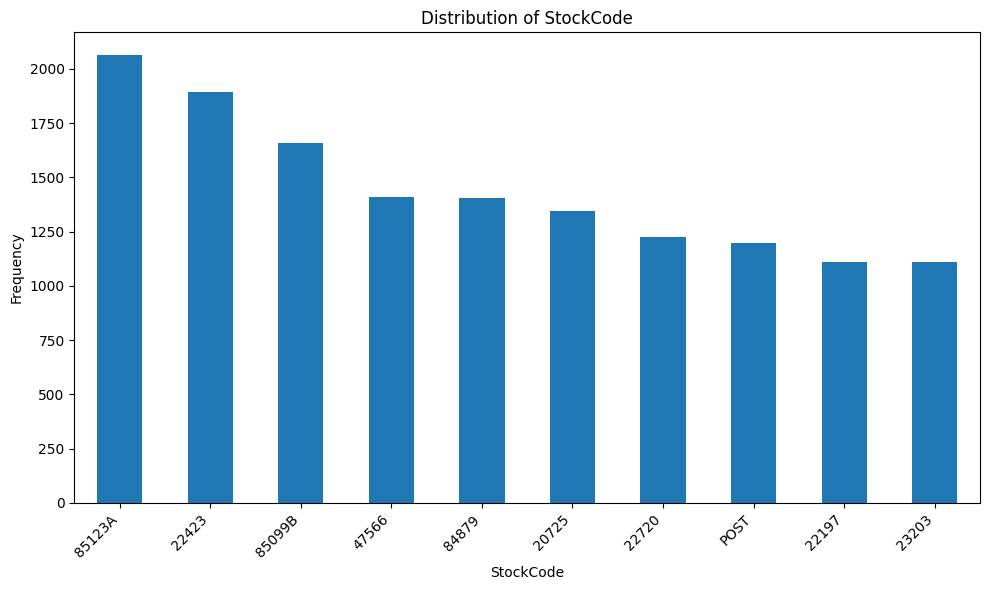


Value counts for Description:
Description
WHITE HANGING HEART T-LIGHT HOLDER    0.005124
REGENCY CAKESTAND 3 TIER              0.004716
JUMBO BAG RED RETROSPOT               0.004131
PARTY BUNTING                         0.003508
ASSORTED COLOUR BIRD ORNAMENT         0.003498
LUNCH BAG RED RETROSPOT               0.003349
SET OF 3 CAKE TINS PANTRY DESIGN      0.003048
POSTAGE                               0.002978
LUNCH BAG  BLACK SKULL.               0.002737
PACK OF 72 RETROSPOT CAKE CASES       0.002644
Name: proportion, dtype: float64


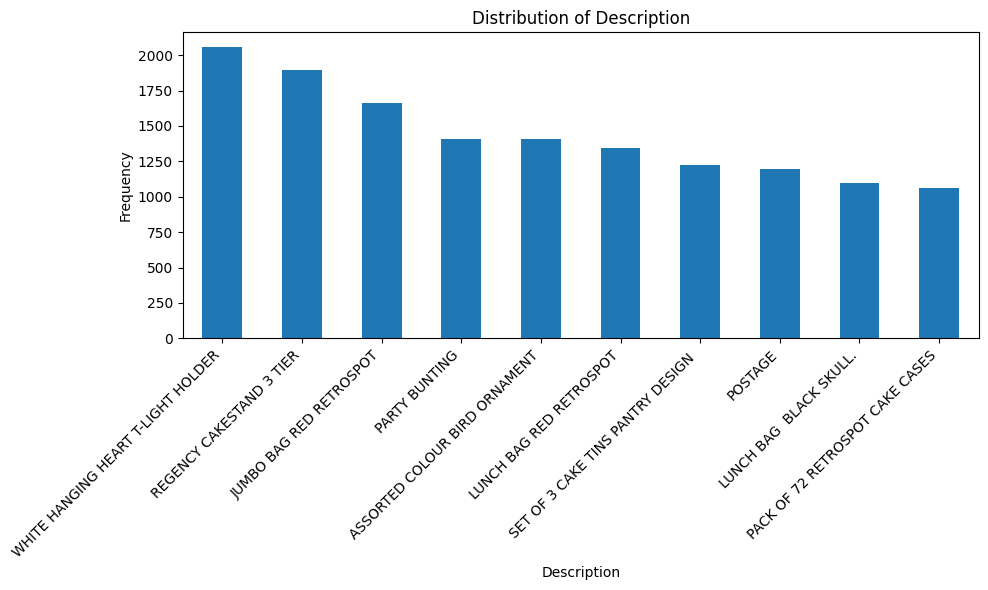


Value counts for InvoiceDate:
InvoiceDate
11/14/2011 15:27    0.001352
11/28/2011 15:54    0.001330
12/5/2011 17:17     0.001320
11/23/2011 13:39    0.001106
10/31/2011 14:09    0.001086
9/21/2011 14:40     0.001051
11/10/2011 12:37    0.000941
10/17/2011 13:31    0.000909
10/10/2011 17:12    0.000881
10/24/2011 17:07    0.000879
Name: proportion, dtype: float64


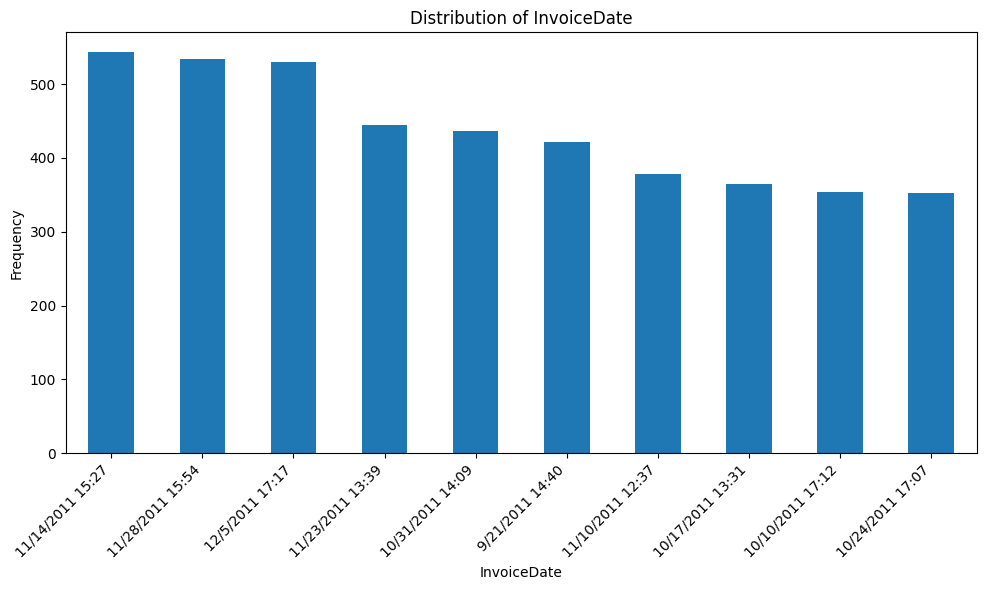


Value counts for CustomerID:
CustomerID
17841.0    0.019452
14911.0    0.014686
14096.0    0.012769
12748.0    0.011103
14606.0    0.006870
15311.0    0.006170
14646.0    0.005192
13089.0    0.004614
13263.0    0.004151
14298.0    0.004084
Name: proportion, dtype: float64


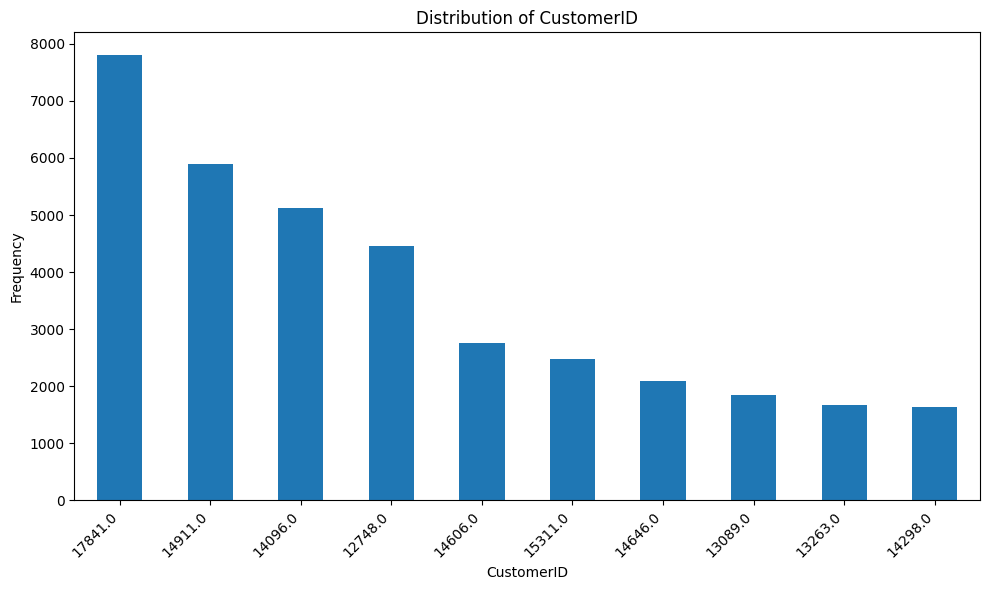


Value counts for Country:
Country
United Kingdom    0.888258
Germany           0.023605
France            0.021103
EIRE              0.018613
Spain             0.006295
Netherlands       0.005904
Belgium           0.005152
Switzerland       0.004674
Portugal          0.003663
Australia         0.003132
Name: proportion, dtype: float64


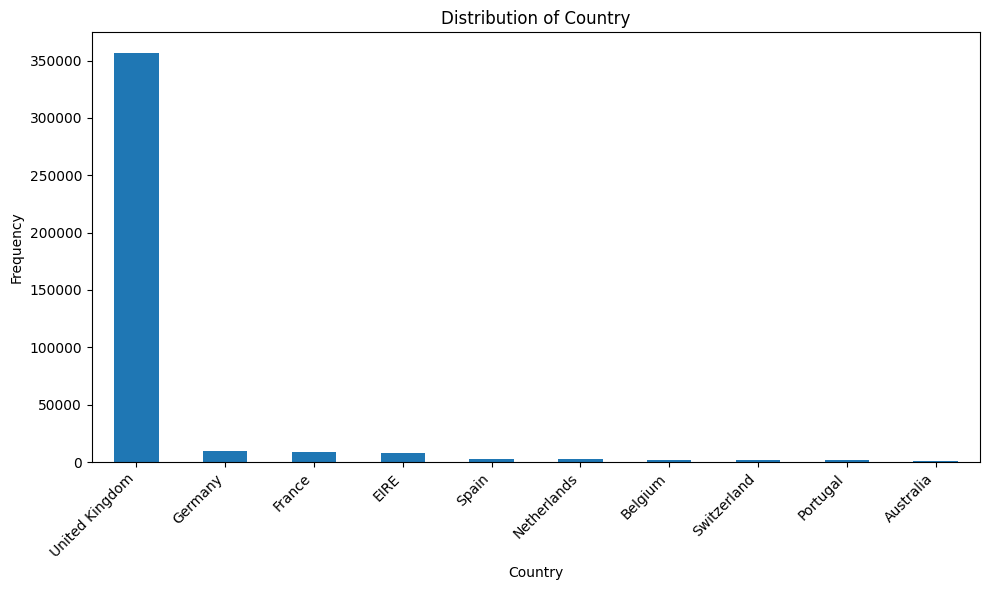

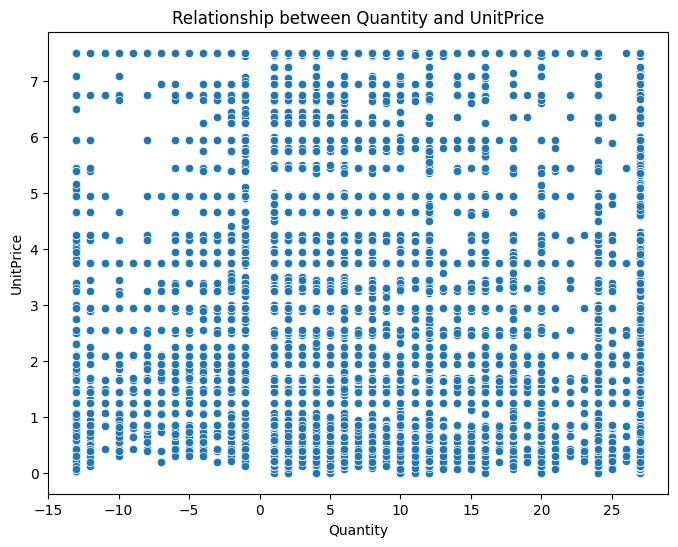

ValueError: could not convert string to float: 'C536379'

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Examine data types
print(df.dtypes)

# 2. Descriptive statistics and visualizations for numerical features
numerical_features = ['Quantity', 'UnitPrice']
for col in numerical_features:
    print(f"\nDescriptive statistics for {col}:\n{df[col].describe()}")
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    plt.figure(figsize=(8,6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

# 3. Analyze the distribution of categorical features
categorical_features = ['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'CustomerID', 'Country']
for col in categorical_features:
    print(f'\nValue counts for {col}:\n{df[col].value_counts(normalize=True).head(10)}')  # Display top 10 frequencies
    plt.figure(figsize=(10, 6)) # Adjust figure size for better visualization
    df[col].value_counts().head(10).plot(kind='bar') # Plot only the top 10 categories
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()

# 4. Investigate relationships between numerical features
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Quantity', y='UnitPrice', data=df)
plt.title('Relationship between Quantity and UnitPrice')
plt.show()
print(df.corr())

# 5. Check data shape and first few rows
print("\nShape of the DataFrame:", df.shape)
display(df.head())

# 6. Document Observations
print("\nObservations:")
# Add your observations here based on the output of the above code

**Reasoning**:
The error `ValueError: could not convert string to float: 'C536379'` indicates that the `corr()` method encountered a non-numeric value in the DataFrame.  The `InvoiceNo` column is likely the culprit.  I will exclude non-numeric columns when calculating the correlation matrix.  Additionally, the previous code has some issues with plotting. I'll correct the previous code, and add further analysis.



InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

Descriptive statistics for Quantity:
count    401604.000000
mean          8.114102
std           8.257794
min         -13.000000
25%           2.000000
50%           5.000000
75%          12.000000
max          27.000000
Name: Quantity, dtype: float64


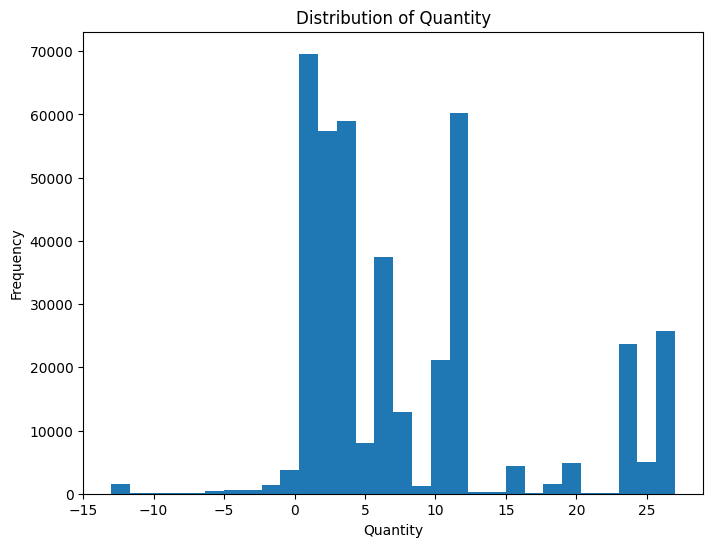

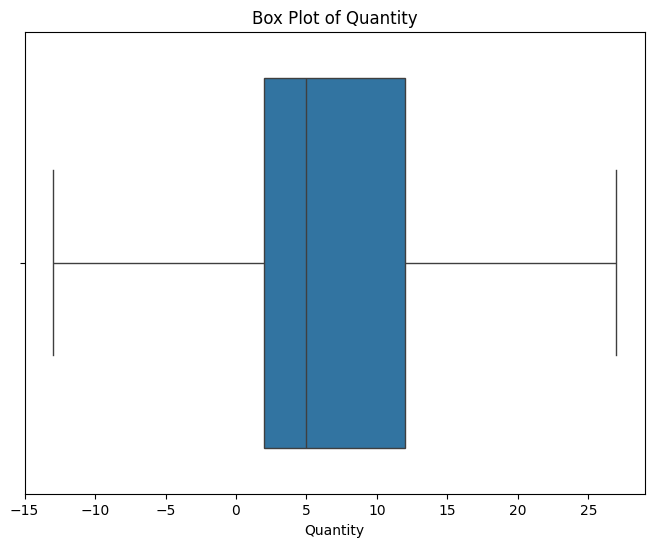


Descriptive statistics for UnitPrice:
count    401604.000000
mean          2.621666
std           2.118421
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max           7.500000
Name: UnitPrice, dtype: float64


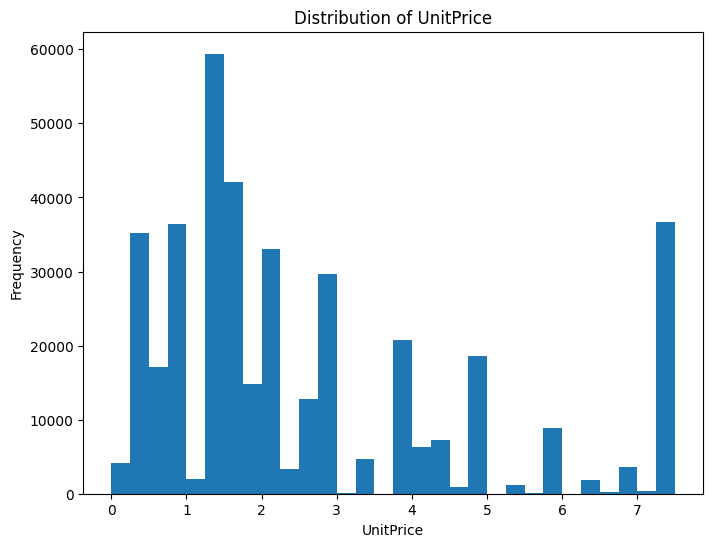

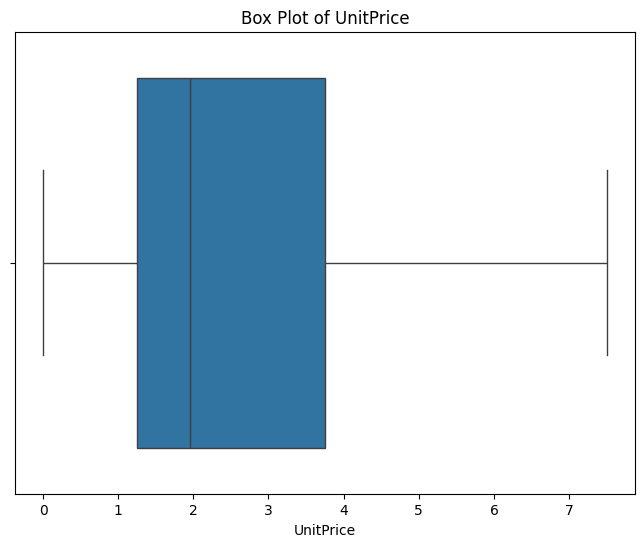


Value counts for InvoiceNo:
InvoiceNo
576339    0.001350
579196    0.001327
580727    0.001317
578270    0.001101
573576    0.001083
567656    0.001048
567183    0.000976
575607    0.000939
571441    0.000906
570488    0.000879
Name: proportion, dtype: float64


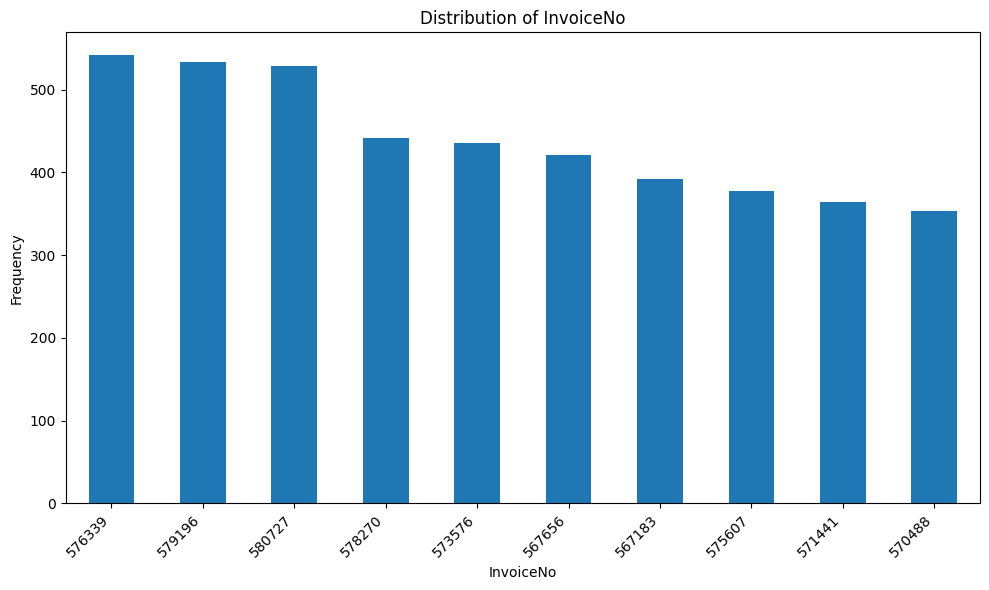


Value counts for StockCode:
StockCode
85123A    0.005142
22423     0.004716
85099B    0.004131
47566     0.003508
84879     0.003498
20725     0.003352
22720     0.003048
POST      0.002978
22197     0.002764
23203     0.002759
Name: proportion, dtype: float64


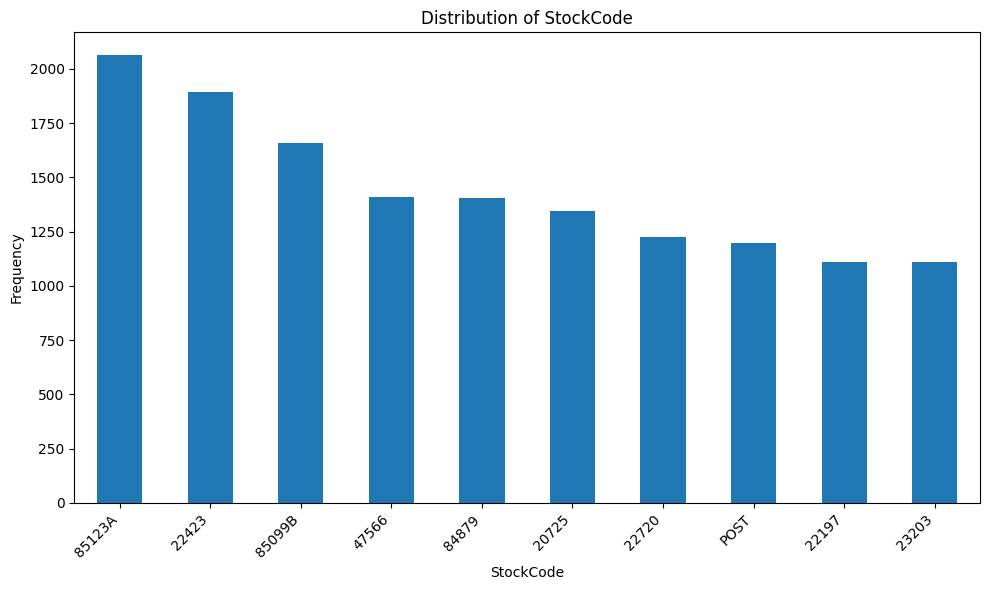


Value counts for Description:
Description
WHITE HANGING HEART T-LIGHT HOLDER    0.005124
REGENCY CAKESTAND 3 TIER              0.004716
JUMBO BAG RED RETROSPOT               0.004131
PARTY BUNTING                         0.003508
ASSORTED COLOUR BIRD ORNAMENT         0.003498
LUNCH BAG RED RETROSPOT               0.003349
SET OF 3 CAKE TINS PANTRY DESIGN      0.003048
POSTAGE                               0.002978
LUNCH BAG  BLACK SKULL.               0.002737
PACK OF 72 RETROSPOT CAKE CASES       0.002644
Name: proportion, dtype: float64


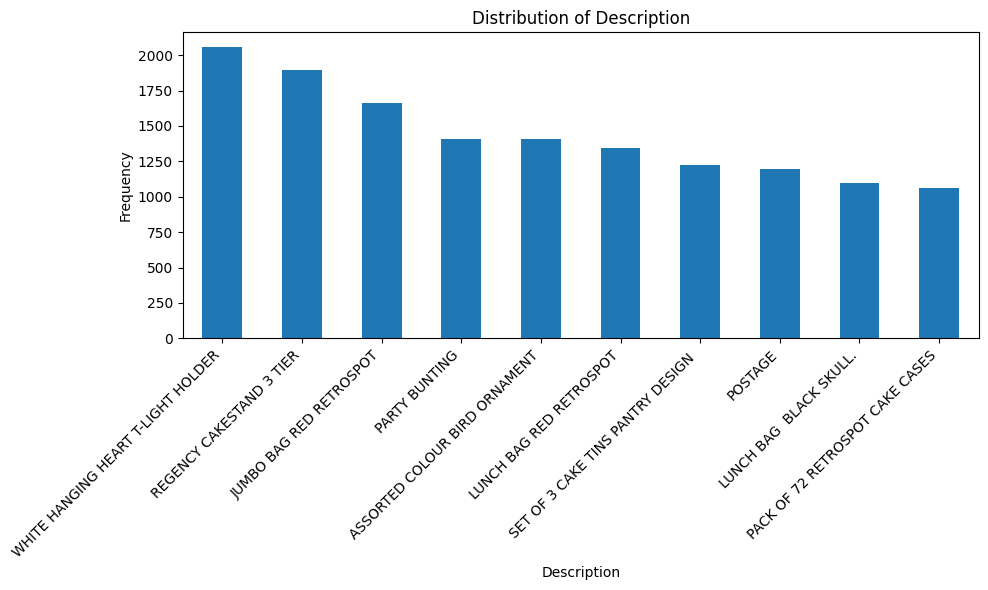


Value counts for InvoiceDate:
InvoiceDate
11/14/2011 15:27    0.001352
11/28/2011 15:54    0.001330
12/5/2011 17:17     0.001320
11/23/2011 13:39    0.001106
10/31/2011 14:09    0.001086
9/21/2011 14:40     0.001051
11/10/2011 12:37    0.000941
10/17/2011 13:31    0.000909
10/10/2011 17:12    0.000881
10/24/2011 17:07    0.000879
Name: proportion, dtype: float64


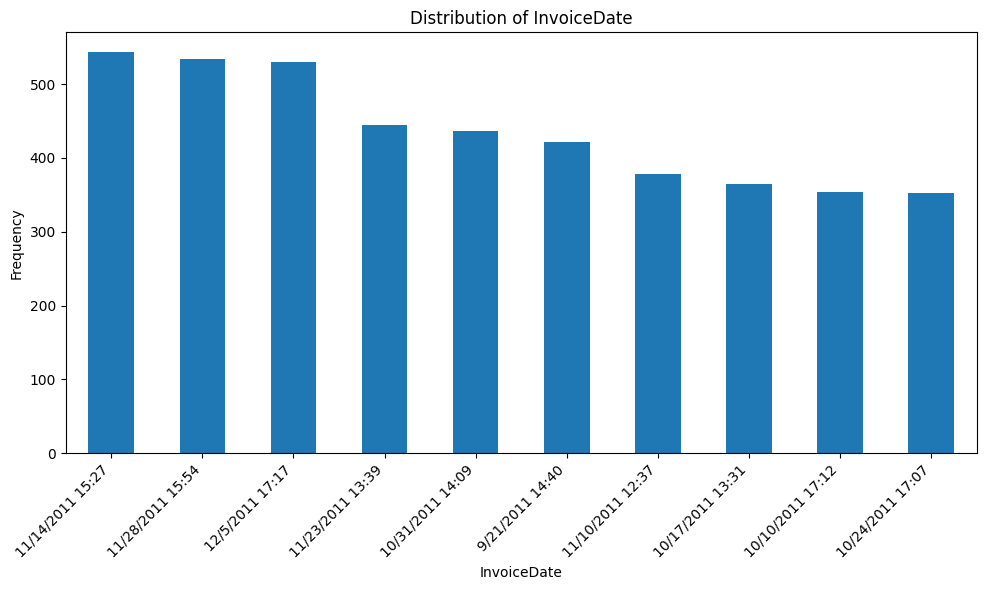


Value counts for CustomerID:
CustomerID
17841.0    0.019452
14911.0    0.014686
14096.0    0.012769
12748.0    0.011103
14606.0    0.006870
15311.0    0.006170
14646.0    0.005192
13089.0    0.004614
13263.0    0.004151
14298.0    0.004084
Name: proportion, dtype: float64


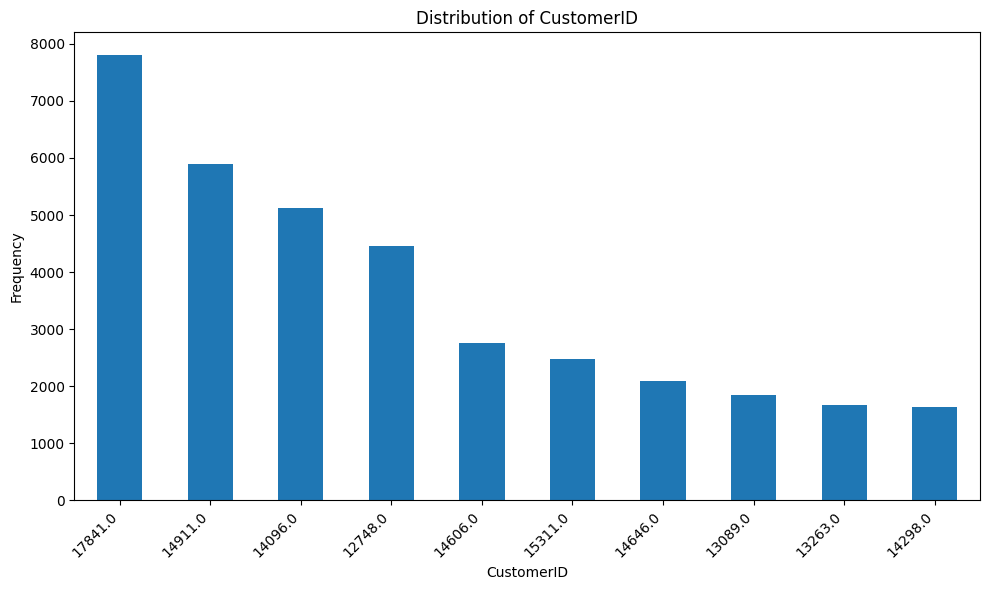


Value counts for Country:
Country
United Kingdom    0.888258
Germany           0.023605
France            0.021103
EIRE              0.018613
Spain             0.006295
Netherlands       0.005904
Belgium           0.005152
Switzerland       0.004674
Portugal          0.003663
Australia         0.003132
Name: proportion, dtype: float64


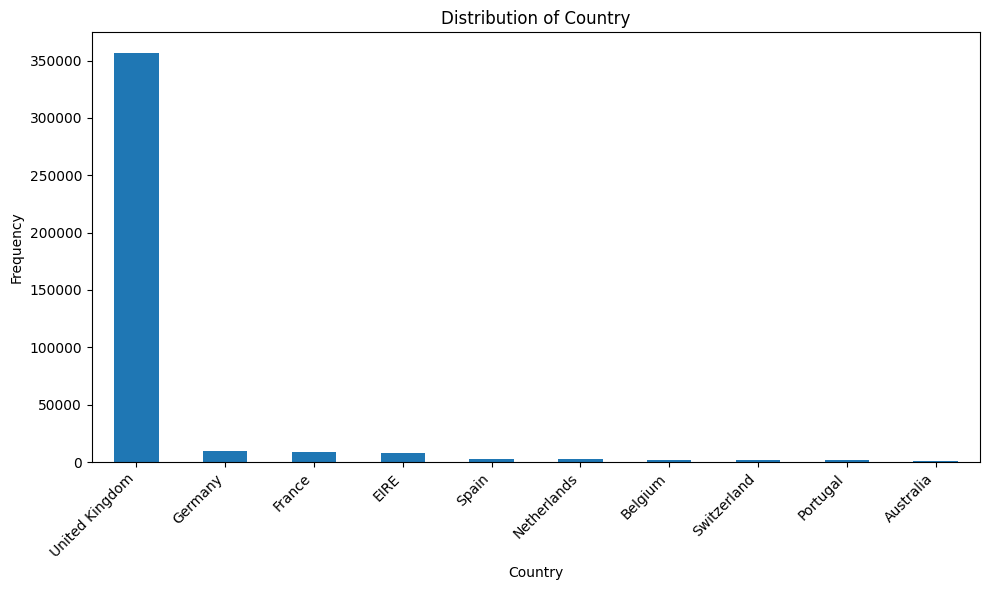

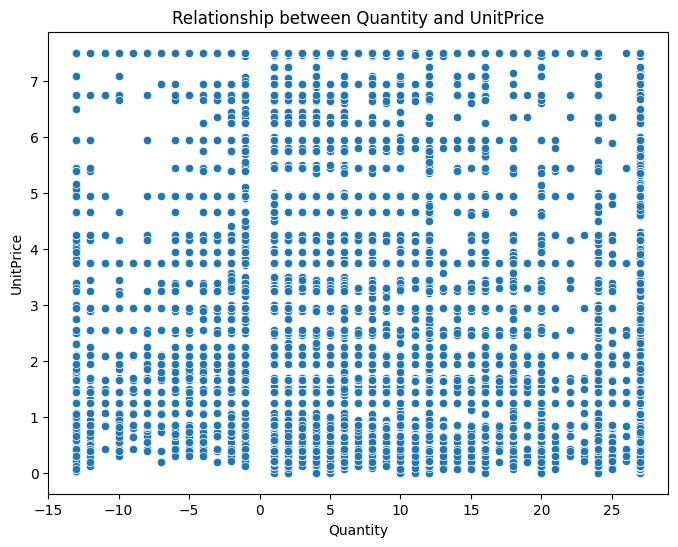


Correlation Matrix (Numeric Columns Only):
             Quantity  UnitPrice  CustomerID
Quantity    1.000000  -0.381738   -0.110131
UnitPrice  -0.381738   1.000000   -0.020095
CustomerID -0.110131  -0.020095    1.000000

Shape of the DataFrame: (401604, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom



Unique values in InvoiceNo: 22190
Unique values in StockCode: 3684
Unique values in CustomerID: 4372
Unique values in Country: 37

Observations:


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Examine data types
print(df.dtypes)

# 2. Descriptive statistics and visualizations for numerical features
numerical_features = ['Quantity', 'UnitPrice']
for col in numerical_features:
    print(f"\nDescriptive statistics for {col}:\n{df[col].describe()}")
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    plt.figure(figsize=(8,6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

# 3. Analyze the distribution of categorical features
categorical_features = ['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'CustomerID', 'Country']
for col in categorical_features:
    print(f'\nValue counts for {col}:\n{df[col].value_counts(normalize=True).head(10)}')
    plt.figure(figsize=(10, 6))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# 4. Investigate relationships between numerical features
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Quantity', y='UnitPrice', data=df)
plt.title('Relationship between Quantity and UnitPrice')
plt.show()

# Calculate the correlation matrix for numerical columns only
numeric_df = df.select_dtypes(include=['number'])
print("\nCorrelation Matrix (Numeric Columns Only):\n", numeric_df.corr())

# 5. Check data shape and first few rows
print("\nShape of the DataFrame:", df.shape)
display(df.head())

#Further Analysis: Check for unique values in relevant columns.
print("\nUnique values in InvoiceNo:", df['InvoiceNo'].nunique())
print("Unique values in StockCode:", df['StockCode'].nunique())
print("Unique values in CustomerID:", df['CustomerID'].nunique())
print("Unique values in Country:", df['Country'].nunique())

# 6. Document Observations
print("\nObservations:")
# Add your observations here based on the output of the above code

## Feature engineering

### Subtask:
Prepare the data for clustering by performing necessary transformations.


**Reasoning**:
Prepare the data for clustering by handling non-numeric columns, scaling numerical features, and potentially creating new features.



In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Convert InvoiceDate to datetime objects
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Feature Engineering: Create 'TotalValue'
df['TotalValue'] = df['Quantity'] * df['UnitPrice']

# Handle non-numeric columns
# Drop 'InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', and 'Country'
# Justification: These columns are not directly relevant to clustering, and their inclusion would require complex one-hot encoding.
df = df.drop(columns=['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country'])

# Scale numerical features
numerical_features = ['Quantity', 'UnitPrice', 'TotalValue']
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

display(df.head())

,Quantity,UnitPrice,CustomerID,TotalValue
0,0.475,0.340000,17850.0,0.376000
1,0.475,0.452000,17850.0,0.392800
2,0.525,0.366667,17850.0,0.398333
3,0.475,0.452000,17850.0,0.392800
4,0.475,0.452000,17850.0,0.392800


## Feature selection

### Subtask:
Perform feature selection on the preprocessed data to identify the most relevant features for clustering.


**Reasoning**:
Identify and remove constant, quasi-constant, and highly correlated features, then calculate mutual information and select features based on these criteria.  Create a new DataFrame `df_selected` containing only the selected features.



In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Constant and Quasi-Constant Features
# Calculate the variance of each feature
variances = df.var()
# Set a threshold for quasi-constant features (e.g., 0.01)
quasi_constant_threshold = 0.01
# Identify quasi-constant features
quasi_constant_features = variances[variances < quasi_constant_threshold].index.tolist()
# Remove quasi-constant features
df = df.drop(columns=quasi_constant_features)

# 2. Correlation Analysis
# Calculate the correlation matrix
correlation_matrix = df.corr()
# Set a correlation threshold
correlation_threshold = 0.95
# Find highly correlated features
upper_triangle = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
highly_correlated_features = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.append(colname)
            break  # Only remove one of the correlated features
# Remove highly correlated features
df = df.drop(columns=highly_correlated_features)

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 3. Mutual Information
# Calculate mutual information between numerical features and 'CustomerID'
mi_scores = mutual_info_classif(df.drop(columns=['CustomerID']), df['CustomerID'])
mi_scores = pd.Series(mi_scores, name="MI Scores", index=df.drop(columns=['CustomerID']).columns)
mi_scores = mi_scores.sort_values(ascending=False)

# Visualize mutual information scores
plt.figure(figsize=(8, 6))
mi_scores.plot(kind='bar')
plt.title('Mutual Information Scores')
plt.ylabel('MI Score')
plt.show()

# Set a threshold for mutual information
mi_threshold = 0.01
# Select features based on MI scores
selected_features = mi_scores[mi_scores > mi_threshold].index.tolist()
selected_features.append('CustomerID')

# 4. Finalize Feature Selection
df_selected = df[selected_features]
display(df_selected.head())

NameError: name 'df' is not defined

**Reasoning**:
The error `IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices` occurs because `upper_triangle[column]` is being used as a boolean index, but it seems like `column` is a string (column name), and boolean indexing requires an array of booleans. The code needs to be fixed to use appropriate indexing.  I'll create a new code block with the corrected code.



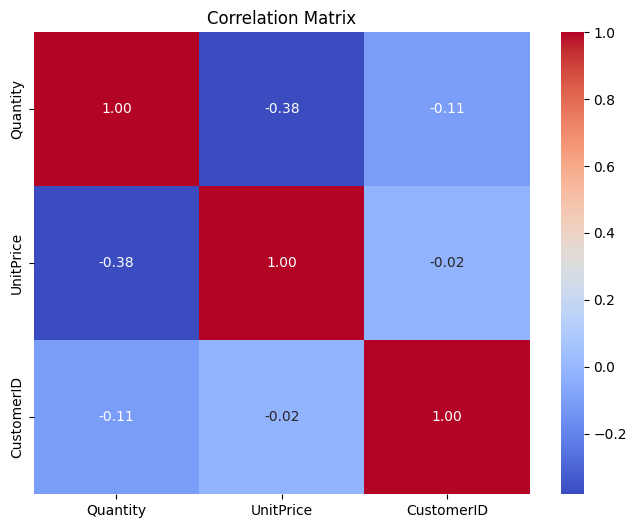

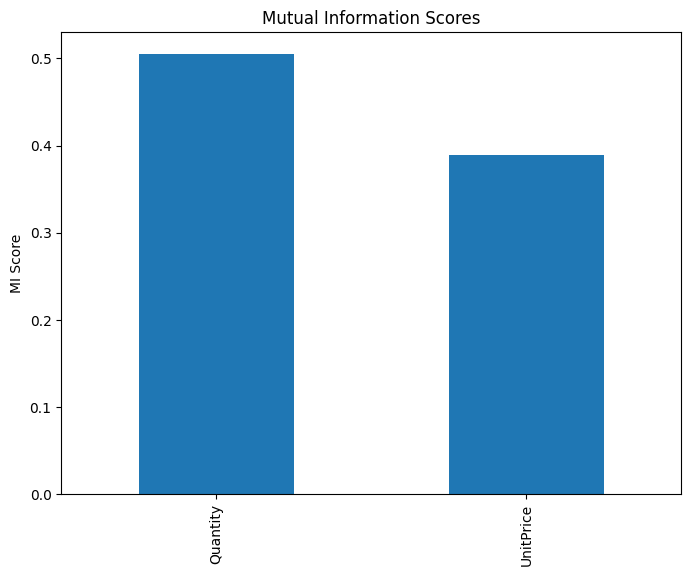

,Quantity,UnitPrice,CustomerID
0,0.475,0.340000,17850.0
1,0.475,0.452000,17850.0
2,0.525,0.366667,17850.0
3,0.475,0.452000,17850.0
4,0.475,0.452000,17850.0


In [8]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Constant and Quasi-Constant Features
# Calculate the variance of each feature
variances = df.var()
# Set a threshold for quasi-constant features (e.g., 0.01)
quasi_constant_threshold = 0.01
# Identify quasi-constant features
quasi_constant_features = variances[variances < quasi_constant_threshold].index.tolist()
# Remove quasi-constant features
df = df.drop(columns=quasi_constant_features)

# 2. Correlation Analysis
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set a correlation threshold
correlation_threshold = 0.95

# Find highly correlated features
upper_triangle = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
highly_correlated_features = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.append(colname)
            break  # Only remove one of the correlated features


# Remove highly correlated features
df = df.drop(columns=highly_correlated_features)

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 3. Mutual Information
# Calculate mutual information between numerical features and 'CustomerID'
mi_scores = mutual_info_classif(df.drop(columns=['CustomerID']), df['CustomerID'])
mi_scores = pd.Series(mi_scores, name="MI Scores", index=df.drop(columns=['CustomerID']).columns)
mi_scores = mi_scores.sort_values(ascending=False)

# Visualize mutual information scores
plt.figure(figsize=(8, 6))
mi_scores.plot(kind='bar')
plt.title('Mutual Information Scores')
plt.ylabel('MI Score')
plt.show()

# Set a threshold for mutual information
mi_threshold = 0.01
# Select features based on MI scores
selected_features = mi_scores[mi_scores > mi_threshold].index.tolist()
selected_features.append('CustomerID')

# 4. Finalize Feature Selection
df_selected = df[selected_features]
display(df_selected.head())

## Data preparation

### Subtask:
Prepare the selected features for model training.


**Reasoning**:
Prepare the selected features for model training by separating features, scaling them, and adding them back to the DataFrame.



In [9]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# 1. Separate features
X = df_selected.drop(columns=['CustomerID']).values

# 2. Create a copy of df_selected
df_cluster = df_selected.copy()

# 3. Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 4. Add scaled features back to df_cluster
df_cluster.loc[:, df_selected.columns.difference(['CustomerID'])] = X

# 5. Display the first few rows of df_cluster
display(df_cluster.head())

,Quantity,UnitPrice,CustomerID
0,-0.256013,-0.033830,17850.0
1,-0.256013,0.362692,17850.0
2,-0.013818,0.060580,17850.0
3,-0.256013,0.362692,17850.0
4,-0.256013,0.362692,17850.0


## Model training

### Subtask:
Train several clustering models on the prepared dataset.


**Reasoning**:
Train several clustering models on the prepared dataset and store the predicted cluster labels.



In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture

# 1. Instantiate models
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)  # Experiment with n_clusters
agglomerative = AgglomerativeClustering(n_clusters=5)  # Experiment with n_clusters, linkage
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Experiment with eps and min_samples
gaussian_mixture = GaussianMixture(n_components=5, random_state=42) # Experiment with n_components
spectral = SpectralClustering(n_clusters=5, random_state=42, assign_labels='kmeans') # Experiment with n_clusters


# 2. Fit models and predict labels
kmeans.fit(df_cluster[['Quantity', 'UnitPrice']])
df_cluster['kmeans_labels'] = kmeans.labels_

agglomerative.fit(df_cluster[['Quantity', 'UnitPrice']])
df_cluster['agglomerative_labels'] = agglomerative.labels_

dbscan.fit(df_cluster[['Quantity', 'UnitPrice']])
df_cluster['dbscan_labels'] = dbscan.labels_

gaussian_mixture.fit(df_cluster[['Quantity', 'UnitPrice']])
df_cluster['gaussian_mixture_labels'] = gaussian_mixture.predict(df_cluster[['Quantity', 'UnitPrice']])

spectral.fit(df_cluster[['Quantity', 'UnitPrice']])
df_cluster['spectral_labels'] = spectral.labels_

# Display first few rows to check the labels
display(df_cluster.head())